In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the public URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("--- First 5 rows of the dataset ---")
display(df.head())

# Check column names and data types
print("\n--- Column Information ---")
print(df.info())

# Check for missing values
print("\n--- Missing Values Count---")
print(df.isnull().sum())

--- First 5 rows of the dataset ---


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan



--- Column Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB
None

--- Missing Values Count---
pickup              0
dropoff  

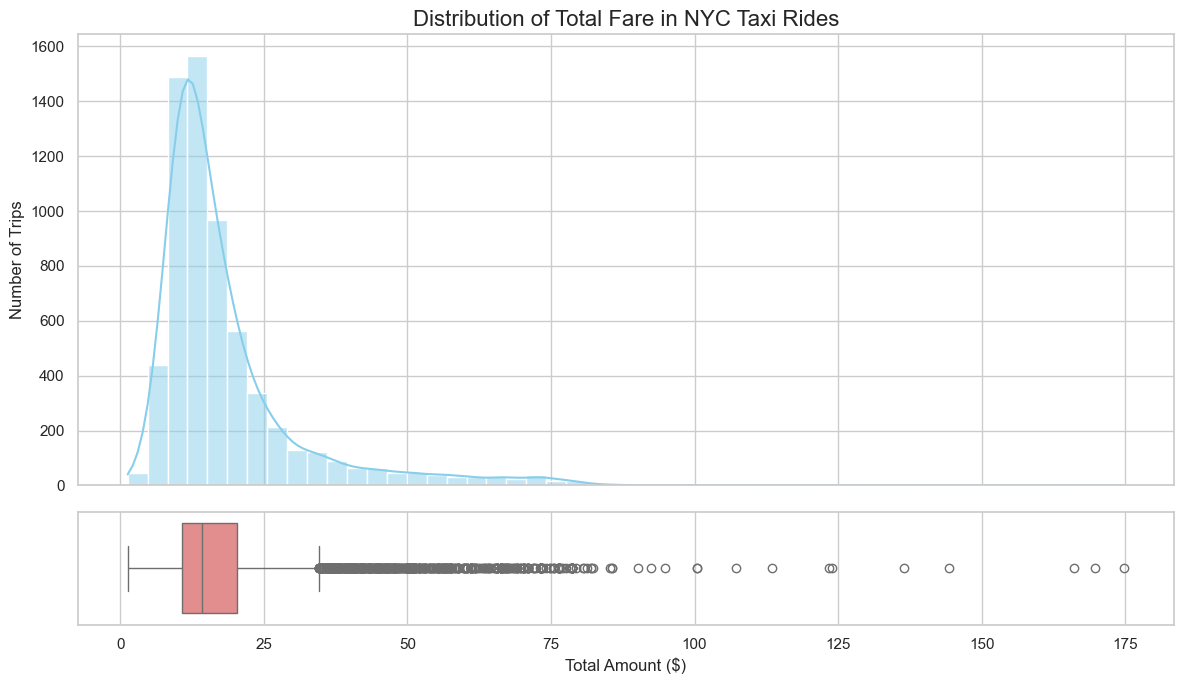

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots: a Histogram and a Boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.8, .2)}, figsize=(12, 7))

# Histogram (Distribution Plot)
sns.histplot(data=df, x="total", bins=50, kde=True, ax=ax_hist, color="skyblue")
ax_hist.set_title('Distribution of Total Fare in NYC Taxi Rides', fontsize=16)
ax_hist.set_ylabel('Number of Trips')

# Boxplot (to see Outliers)
sns.boxplot(data=df, x="total", ax=ax_box, color="lightcoral")
ax_box.set_xlabel('Total Amount ($)')

plt.tight_layout()
plt.show()

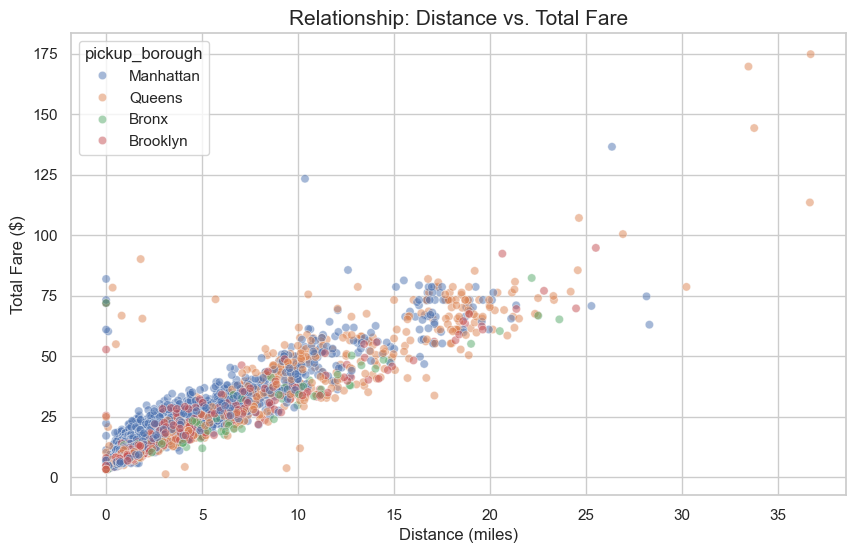

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="total", alpha=0.5, hue="pickup_borough")
plt.title('Relationship: Distance vs. Total Fare', fontsize=15)
plt.xlabel('Distance (miles)')
plt.ylabel('Total Fare ($)')
plt.show()

In [9]:
# Convert strings to real datetime objects
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

# Extract useful numbers from time
df['hour'] = df['pickup'].dt.hour
df['day_of_week'] = df['pickup'].dt.dayofweek # 0=Monday, 6=Sunday

# Calculate trip duration (minutes) - Very important for fare!
df['duration'] = (df['dropoff'] - df['pickup']).dt.total_seconds() / 60

print("New time-based features created!")
display(df[['pickup', 'hour', 'day_of_week', 'duration']].head())

New time-based features created!


,pickup,hour,day_of_week,duration
0,2019-03-23 20:21:09,20,5,6.250000
1,2019-03-04 16:11:55,16,0,7.083333
2,2019-03-27 17:53:01,17,2,7.400000
3,2019-03-10 01:23:59,1,6,25.866667
4,2019-03-30 13:27:42,13,5,9.533333


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Select our "Features" (X) and "Target" (y)
# We drop rows with missing values first to avoid errors
df_model = df[['distance', 'hour', 'day_of_week', 'total']].dropna()

X = df_model[['distance', 'hour', 'day_of_week']]
y = df_model['total']

# 2. Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = lr_model.predict(X_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE (Average Error): ${rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Model Performance:
RMSE (Average Error): $6.37
R-squared Score: 0.78


In [11]:
# Create a DataFrame to see the coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Weight'])
intercept = lr_model.intercept_

print(f"Base Fare (Intercept): ${intercept:.2f}")
print("\nFeature Weights:")
print(coefficients)

Base Fare (Intercept): $7.96

Feature Weights:
               Weight
distance     3.275119
hour         0.073613
day_of_week -0.116180


In [12]:
# 1. Add 'duration' to our feature list
features_v2 = ['distance', 'hour', 'day_of_week', 'duration']
df_v2 = df[features_v2 + ['total']].dropna()

X2 = df_v2[features_v2]
y2 = df_v2['total']

# 2. Split and Train again
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model_v2 = LinearRegression()
model_v2.fit(X_train2, y_train2)

# 3. Predict and Evaluate
y_pred2 = model_v2.predict(X_test2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_v2 = r2_score(y_test2, y_pred2)

print(f"--- Updated Model Performance ---")
print(f"New RMSE: ${rmse2:.2f} (Previous: $6.37)")
print(f"New R-squared: {r2_v2:.2f} (Previous: 0.78)")

--- Updated Model Performance ---
New RMSE: $6.17 (Previous: $6.37)
New R-squared: 0.80 (Previous: 0.78)


In [13]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest
# n_estimators=100 means we are using 100 "trees" to vote on the price
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model (this might take a few seconds longer than Linear Regression)
rf_model.fit(X_train2, y_train2)

# 3. Predict and Evaluate
y_pred_rf = rf_model.predict(X_test2)
rmse_rf = np.sqrt(mean_squared_error(y_test2, y_pred_rf))
r2_rf = r2_score(y_test2, y_pred_rf)

print(f"--- Random Forest Performance ---")
print(f"New RMSE: ${rmse_rf:.2f}")
print(f"New R-squared: {r2_rf:.2f}")

--- Random Forest Performance ---
New RMSE: $5.99
New R-squared: 0.81


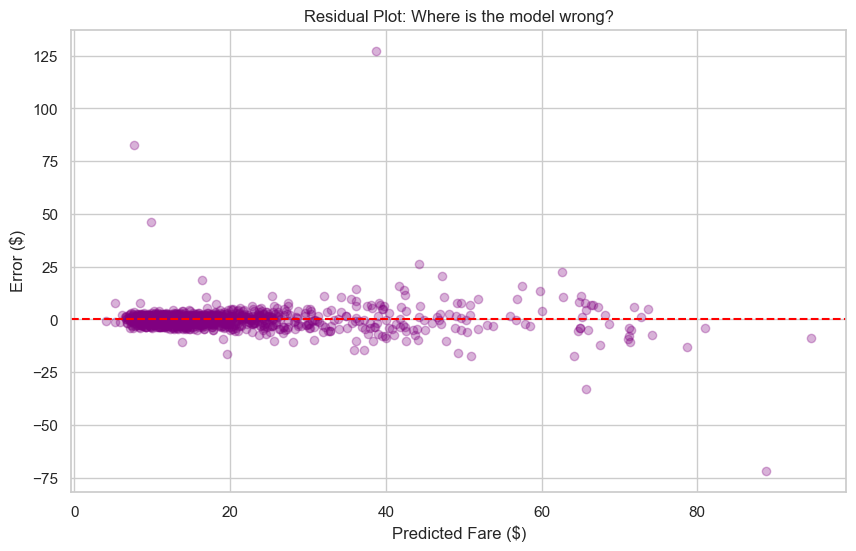

In [14]:
plt.figure(figsize=(10, 6))
residuals = y_test2 - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.3, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Where is the model wrong?')
plt.xlabel('Predicted Fare ($)')
plt.ylabel('Error ($)')
plt.show()

/var/folders/30/ygjd7h_d5qd139f8by1hn0f80000gn/T/ipykernel_6375/3562435902.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


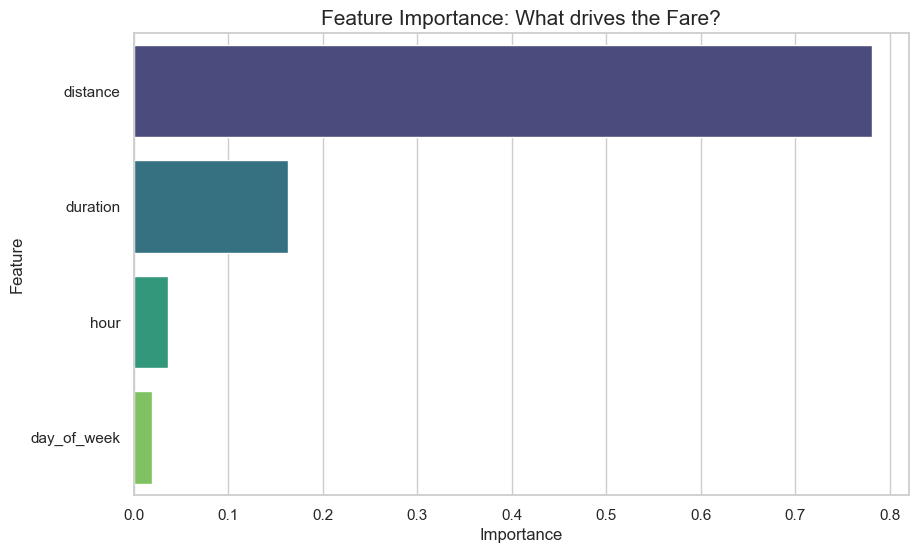

In [15]:
# Extract feature importance from the Random Forest
importances = rf_model.feature_importances_
feature_names = X2.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance: What drives the Fare?', fontsize=15)
plt.show()

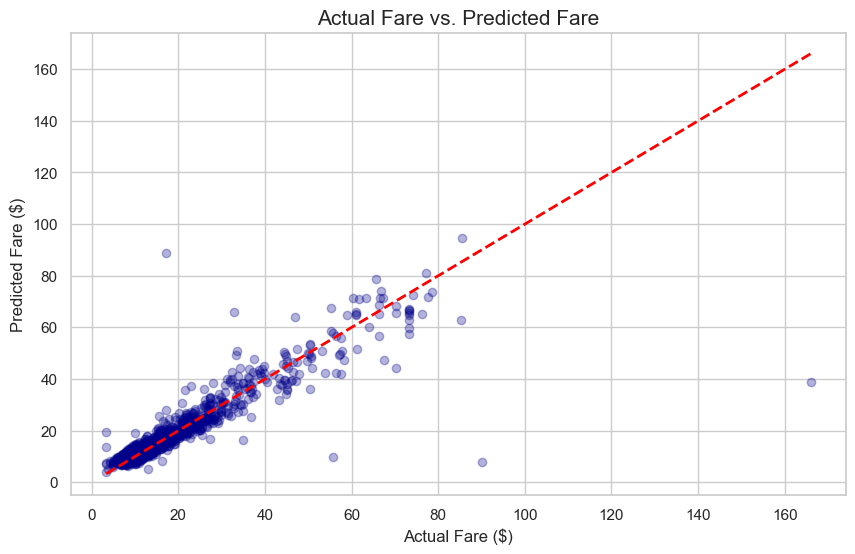

In [16]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.scatter(y_test2, y_pred_rf, alpha=0.3, color='darkblue')

# Plot a diagonal line (Perfect Prediction Line)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', lw=2, linestyle='--')

plt.title('Actual Fare vs. Predicted Fare', fontsize=15)
plt.xlabel('Actual Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.show()

In [17]:
# 1. Select the features including the Borough
features_v3 = ['distance', 'hour', 'day_of_week', 'duration', 'pickup_borough']
df_v3 = df[features_v3 + ['total']].dropna()

# 2. Use "Get Dummies" to turn Borough names into columns (0 or 1)
# This creates columns like 'pickup_borough_Manhattan', 'pickup_borough_Queens', etc.
df_encoded = pd.get_dummies(df_v3, columns=['pickup_borough'])

# 3. Prepare X and y again
X3 = df_encoded.drop('total', axis=1)
y3 = df_encoded['total']

# 4. Split and Train with Random Forest
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
rf_model_v3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_v3.fit(X_train3, y_train3)

# 5. Evaluate
y_pred_v3 = rf_model_v3.predict(X_test3)
rmse_v3 = np.sqrt(mean_squared_error(y_test3, y_pred_v3))
r2_v3 = r2_score(y_test3, y_pred_v3)

print(f"--- Model v3 (With Boroughs) ---")
print(f"New RMSE: ${rmse_v3:.2f}")
print(f"New R-squared: {r2_v3:.2f}")

--- Model v3 (With Boroughs) ---
New RMSE: $3.81
New R-squared: 0.92


In [20]:
import joblib
import os

# 1. Create the models folder if it doesn't exist
if not os.path.exists('../models'):
    os.makedirs('../models')

# 2. Save the model into that folder
joblib.dump(rf_model_v3, '../models/nyc_taxi_rf_model.pkl')
print("✅ Model saved successfully in the 'models/' folder!")

# 3. Save the new 92% model
joblib.dump(rf_model_v3, '../models/nyc_taxi_rf_model.pkl')
print("✅ Saved the 92% Accuracy Model!")

✅ Model saved successfully in the 'models/' folder!
✅ Saved the 92% Accuracy Model!
